# Avance II
Equipo: 6 Grupo: 02 , viernes 15 a 18 hrs

Integrantes:
* 1837533 Castillo Cabello Carolina 
* 1686204 Muñiz Salazar Rogelio

## Dataset de Gastos Médicos Personales
Esta base de datos describe los costos de un seguro de Gastos Médicos en Estados Unidos, proporcionando la información de 1338 individuos como su sexo, edad, índice de masa corporal, número de hijos, si son fumadores y los costos de un seguro de gastos médicos. 

Los datos tienen el siguiente formato:
* Edad del asegurado: Entero
* Género: Objeto
* Índice de masa corporal: Flotante
* Número de hijos: Objeto
* Indicador si fuma: Objeto
* Región donde vive el asegurado: Objeto
* Prima del seguro: Flotante

Decidimos utilizar esta base de datos, ya que nos parecía interesante poder descubrir la influencia monetaria que tenían cada una de las variables con el costo de una prima de seguros de gastos médicos, así como el intentar predecir el coste de una prima según las variables indicadas.

##### Preguntas de interés:
* ¿Qué variables tienen mayor impacto en la prima de un seguro de Gastos Médicos?
* ¿Se puede predecir el coste de una prima de Gastos Médicos en base a las variables consideradas?

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

#### Desarrollo de las herramienas
##### 1.- Limpieza de datos
A continuación se muestran los datos sin manipulación.

In [2]:
df = pd.read_csv("insurance.csv",encoding='utf8')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Se muestra el tipo de dato de cada variable y se revisan sus espacios en blanco

In [3]:
df.dtypes #tipo de dato

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Ya teniendo la certeza que a nuestra base de datos cuenta con los datos correctos seguimos a modificarla.
A la base de datos original no se le va a retirar ninguna columna. Se le modificará la columna de fumador, como una variable indicadora con 1 si es fumador y 0 si no es fumador, con motivo de que sea más fácil contabilizar y ver su densidad en distintos ejercicios. Así como también se va a agregar una nueva columna en la cual se va a dividir por clases el índice de masa corporal (bmi) como Bajo (menor a 28 kg/m^2) Medio (entre 28kg/m^2 y 41kg/m^2) y alto (superior a 54kg/m^2) y otra que nos divida por clases la edad de nuestra población para identificar los grupos de edades con ciertas características en distintos ejercicios, comenzando por jóvenes de 18 a 30 años, adultos de 30 a 55 años y mayores de 55 a 64 años. 
Con esto creamos una nueva base de datos

In [5]:
y=[]
z=[]
w=[]
datos_x = df["smoker"]
for i in datos_x:
    if (i=="yes"):
        i=1
    else:
        i=0
    y.append(i)    
df["smoker"]=y
   

datos_y=df["bmi"]
for j in datos_y:
    if (j<28):
        j="Bajo"
    elif(j>28 and j<41):
        j="Medio"
    else:
        j="Alto"        
    z.append(j)

imc=pd.DataFrame(z)    
df['imc'] = imc #agregar

datos_w=df["age"]
for k in datos_w:
    if (k<30):
        k="Joven"
    elif(k>30 and k<55):
        k="Adulto"
    else:
        k="Mayor"        
    w.append(k)

categoria=pd.DataFrame(w)    
df['categoria'] =categoria

data=df
data.head(15)

,age,sex,bmi,children,smoker,region,charges,imc,categoria
0,19,female,27.900,0,1,southwest,16884.92400,Bajo,Joven
1,18,male,33.770,1,0,southeast,1725.55230,Medio,Joven
2,28,male,33.000,3,0,southeast,4449.46200,Medio,Joven
3,33,male,22.705,0,0,northwest,21984.47061,Bajo,Adulto
4,32,male,28.880,0,0,northwest,3866.85520,Medio,Adulto
5,31,female,25.740,0,0,southeast,3756.62160,Bajo,Adulto
6,46,female,33.440,1,0,southeast,8240.58960,Medio,Adulto
7,37,female,27.740,3,0,northwest,7281.50560,Bajo,Adulto
8,37,male,29.830,2,0,northeast,6406.41070,Medio,Adulto
9,60,female,25.840,0,0,northwest,28923.13692,Bajo,Mayor


##### 2.- Estadística Básica
En esta parte nos enfocaremos en nuestra primera pregunta de interés, que es determinar cuál variable es la que tiene más impacto en una prima de un seguro de GM. Comenzamos mostrando la estadística de nuestra variable referente a la prima de nuestra base de datos.

In [6]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Se puede observar en promedio la prima cobrada por una compañía aseguradora es de: 13,270.422, lo que es mucho menor que el máximo de lo que se cobra que es: 63,770.42. Nuestro propósito es determinar a qué variables le podemos atribuir este incremento.
Para el resto de estadísticas a mostrar es importante determinar si existe algún tipo de sesgo.

In [7]:
data.groupby(['sex'])[['sex']].size()

sex
female    662
male      676
dtype: int64

In [8]:
data.groupby(['imc'])[['imc']].size()

imc
Alto      71
Bajo     466
Medio    801
dtype: int64

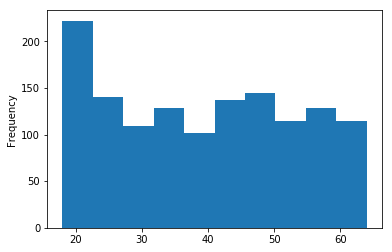

In [9]:
data['age'].plot.hist()

Se puede observar que la cantidad de hombres y mujeres elegidos para este estudio es balanceada. También que la mayoría tiene un índice de masa corporal medio, seguidos por los que tienen un IMC bajo y por último los que tienen un IMC alto y con la gráfica se puede observar que hay más individuos menores de 20 años que del resto de las edades de la población.

A continuación, realizaremos un análisis por regiones de algunas de nuestras variables para determinar si hay alguna región que podremos determinar que sea de "alto riesgo".

In [10]:
pkt = data.pivot_table(index="region",values=["charges","bmi","age","children"],aggfunc='mean')
pkt.head()

,age,bmi,charges,children
region,,,,
northeast,39.268519,29.173503,13406.384516,1.046296
northwest,39.196923,29.199785,12417.575374,1.147692
southeast,38.939560,33.355989,14735.411438,1.049451
southwest,39.455385,30.596615,12346.937377,1.141538


In [11]:
pkt1 = data.pivot_table(index="region",values=["smoker"], aggfunc='sum')
pkt1.head()

,smoker
region,
northeast,67
northwest,58
southeast,91
southwest,58


Aquí podemos inferir que el sureste (southeast) es la región que en promedio presenta el mayor monto en prima y adicional es la que en promedio tiene un mayor IMC y cuenta con más fumadores. Teniendo en cuenta que en promedio la edad es la menor podemos atribuir que esta región presenta peores hábitos y se ve reflejado en la prima que se cobra a sus asegurados.

Por último, es importante destacar los siguientes datos sobre Fumadores para tomarlos en cuenta en nuestras conclusiones de las siguientes graficas

In [12]:
data['smoker'].mean()

0.20478325859491778

In [13]:
pkt1 = data.pivot_table(index="sex",values=["smoker"], aggfunc='sum')
pkt1.head()

,smoker
sex,
female,115
male,159


Con estos datos podemos concluir que un poco más del 20% de nuestra población tiene el hábito de fumar y que es mayor el número de hombres fumadores que mujeres

##### 3.- Graficas
Iniciaremos con un mapa de calor con el fin de visualizar la correlación de nuestras variables para identificar cuáles pueden ser el principal objeto de estudio.

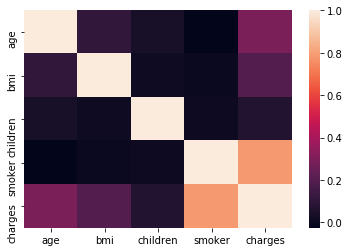

In [14]:
corr= data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

Se puede observar que la variable que tiene más influencia en la prima del seguro es si la persona fuma o no, seguido por la edad, el IMC y finalmente el número de hijos. Aquí podemos comenzar a ver cuáles son las variables que tienen mayor impacto en la prima.

Comenzando por la variable de fumador, graficaremos un box plot vs la prima para ver la distribución entre fumadores y no fumadores

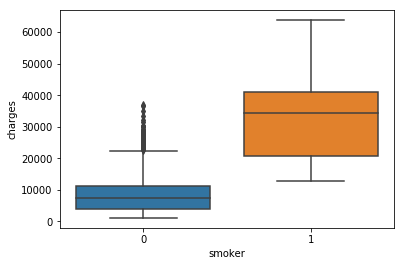

In [15]:
box = data[data.smoker.isin(data.smoker.value_counts().index)]
sns.boxplot(x='smoker', y='charges', data=box)

Se puede observar que efectivamente que las primas cobradas a un fumador en promedio son mucho más altos que los costos de un no fumador. Pero también podemos observar que hay muchos valores atípicos con cargos más altos del lado de los no fumadores. Comenzaremos a analizar estos valores atípicos

In [16]:
nofumadores=data[data['smoker']==0]
nofumadores=nofumadores[nofumadores['charges']>20000]
nofumadores.head()

,age,sex,bmi,children,smoker,region,charges,imc,categoria
3,33,male,22.705,0,0,northwest,21984.47061,Bajo,Adulto
9,60,female,25.840,0,0,northwest,28923.13692,Bajo,Mayor
45,55,male,37.300,0,0,southwest,20630.28351,Medio,Mayor
62,64,male,24.700,1,0,northwest,30166.61817,Bajo,Mayor
102,18,female,30.115,0,0,northeast,21344.84670,Medio,Joven


Se filtró de la base de datos a los NO fumadores y los que presentan una prima mayor a 20,000, con esta extracción de la BD se realiza un gráfico de dispersión donde ubicamos a estas personas con la categoría de su imc.

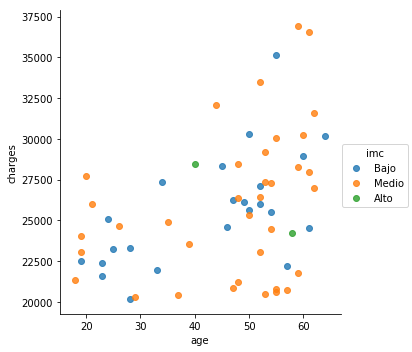

In [17]:
sns.lmplot(x='age', y='charges', hue='imc', 
           data=nofumadores.loc[nofumadores['imc'].isin(['Alto', 'Medio','Bajo'])], 
           fit_reg=False)

Analizando estos valores atípicos de los no fumadores podemos identificar que están ligeramente cargados a la derecha y que los que tienen una prima más elevada es por que empiezan a ser afectadas principalmente por la edad ya que su imc se encuentra en un nivel medio en su mayoría.

A continuacion se realiza un ejercicio similar al anterior, en este boxplot se muestra por categoria Hombre y Mujer para identificar si esta variable influye en la prima

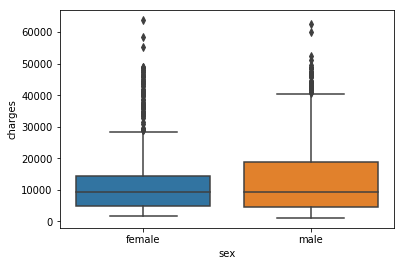

In [18]:
box = data[data.smoker.isin(data.smoker.value_counts().index)]
sns.boxplot(x='sex', y='charges', data=box)

Podemos concluir que los hombres presentan mayores cargos en prima que las mujeres, pero esta vez observamos valores atípicos en las ambas categorías. Comenzamos por filtrar ambas categorías y también filtramos a partir de cuales cargos se empiezan a mostrar estos valores atípicos.

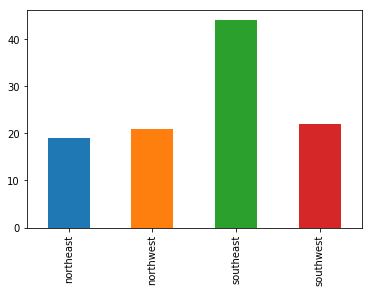

In [19]:
F=data[data['sex']=="female"]
F=F[F['charges']>30000]
M=data[data['sex']=="male"]
M=M[M['charges']>40000]
atipicos=pd.concat([M,F])
atipicos['region'].value_counts().sort_index().plot.bar()

Entonces con esta extracción de la base de datos realizamos un análisis por región la cual nos muestra que la gran mayoría de estas personas pertenecen a la región del sureste (southeast) la que habíamos mencionado en nuestra estadística básica que es la región con el mayor número de fumadores y que presenta en promedio mayor imc que el resto de las regiones.

Revisando el resto de regiones encontramos:

Text(0.5,1,'proporcion de Fumadores')

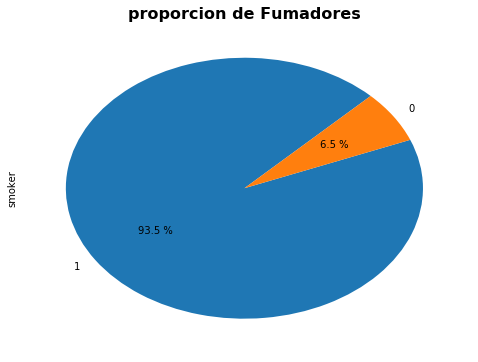

In [20]:
sinse=atipicos[atipicos['region']!="southeast"]
ax = sinse.smoker.value_counts().plot.pie(startangle=45,
                                               autopct='%.1f %%',
                                               figsize=(8, 6))
ax.set_title("proporcion de Fumadores",
             fontsize=16, weight="bold")

Revisando el Resto de valores atípicos podemos inferir que en su gran mayoría las personas son fumadoras.

Un dato que creemos importante mostrar es la covarianza que existe entre los cargos y el bmi (imc), adicional a esto mostramos por colores a las los fumadores y no fumadores

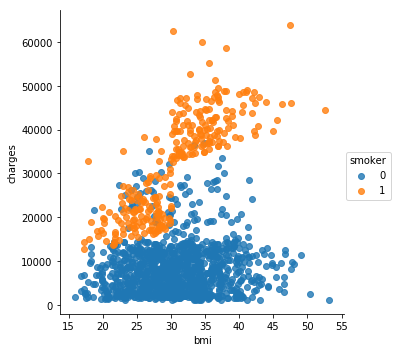

In [21]:
sns.lmplot(x='bmi', y='charges', hue='smoker', 
           data=data.loc[data['smoker'].isin([1,0])], 
           fit_reg=False)

Con esto podemos concluir que existe covarianza positiva entre los cargos y el bmi (imc), es decir si el bmi crece los cargos crecen, adicional a esto la misma grafica muestra que los cargos en primas aumentan considerablemente si la persona es fumadora, es decir si la persona fuma y tiene un imc alto su cargo en prima es de los más altos.

El siguiente grafico es para mostrar la linealidad y covarianza positiva que existe entre los cargos y la edad, entre más edad tengas más aumentan la prima a pagar.

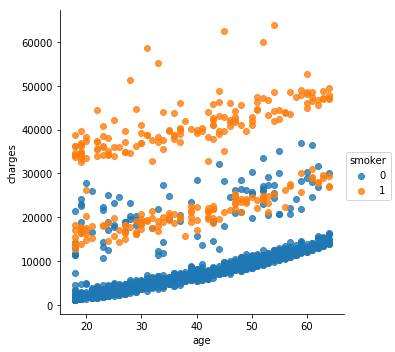

In [22]:
sns.lmplot(x='age', y='charges', hue='smoker', 
           data=data.loc[data['smoker'].isin([1,0])], 
           fit_reg=False)

Tambien es claro que el hecho de ser fumador aumenta el monto a pagar de la prima y esta mas cuando ya estas a una edad avanzada.

##### Conclusión final

Al ir trabajando esta base de datos nos pudimos dar cuenta que existen varios factores que pueden influir para determinar monto de una prima de un seguro de gastos médicos, es un hecho que se puede decir que influye el hecho que seas mujer u hombre hasta en que región del país vives, pero también es un hecho que estas van en función de variables como la edad, el índice de masa corporal y si eres fumador o no. 

Después de este análisis podemos concluir que las variables que más tienen impacto en la prima de un seguro de gastos médicos es la Edad y hecho de que seas fumador o no, no es ningún secreto que estas dos pueden ser indicadoras del estado de salud de una persona.
